In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

INFO:pypsa.network.io:New version 1.0.2 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [43]:
def drop_backstop(df):
    return df[~(df.index.get_level_values("carrier") == "Backstop")]

In [44]:
n.add("Carrier",
          name="Hydrogen",
          co2_emissions=0.0,     
          color="skyblue")

n.add("Bus",
      name="BRN_H2",
      carrier="Hydrogen",
      v_nom=1.0,
      x= n.buses.x["BRNXX"],
      y= n.buses.y["BRNXX"])

n.add("Link",
      name="Electrolyzer_BRN",
      bus0="BRNXX",
      bus1="BRN_H2",
      efficiency=0.7,
      p_nom=10,
      p_nom_extendable=True,
      capital_cost=170000.0, 
      marginal_cost=71.43,
      carrier="Hydrogen")

n.add("Load",
      name="HydrogenDemand_BRN",
      bus="BRN_H2",
      carrier="Hydrogen")

n.loads_t.p_set["HydrogenDemand_BRN"] = 20.0

# Add a global constraint to enforce total hydrogen balance over all snapshots
# n.add("GlobalConstraint",
#       name="HydrogenAnnualBalance",
#       type="primary",             # sum of hydrogen production across snapshots
#       carrier_attribute="carrier",
#       carrier="hydrogen",
#       sense="==",                 # total production must match demand
#       constant=500_000,           # MW-snapshot units for 1 TWh/year
#       n_cycles=1)


In [5]:
n.optimize(n.snapshots[::24])

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00, 14.19it/s]
INFO:linopy.io: Writing time: 5.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 282066 primals, 936780 duals
Objective: 7.99e+09
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x1eda70b8190>},
 'branches': {'Link': <matplotlib.collections.LineCollection at 0x1eda70b8410>},
 'flows': {}}

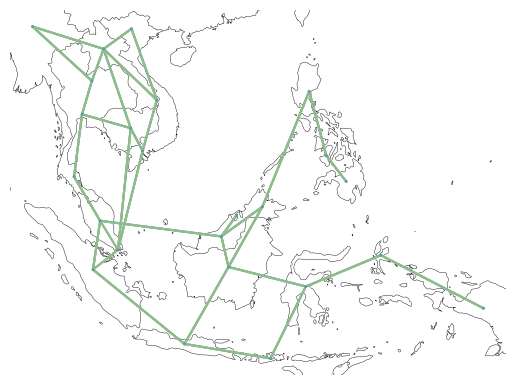

In [46]:
n.plot.map()

In [47]:
# cap = drop_backstop(n.statistics.installed_capacity())
# cap.plot.barh(figsize=(10,6))

# n.statistics.installed_capacity.iplot()

In [10]:
n.statistics.capex()
n.buses

,v_nom,type,x,y,carrier,unit,location,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,,
IDNSM,1.0,,101.5210,-0.4560,AC,,,1.0,0.0,inf,PQ,,
IDNJW,1.0,,109.9410,-7.2990,AC,,,1.0,0.0,inf,PQ,,
IDNNU,1.0,,117.8580,-8.6310,AC,,,1.0,0.0,inf,PQ,,
IDNKA,1.0,,113.9950,-0.2110,AC,,,1.0,0.0,inf,PQ,,
IDNSL,1.0,,121.1120,-2.0140,AC,,,1.0,0.0,inf,PQ,,
IDNML,1.0,,128.0160,0.8690,AC,,,1.0,0.0,inf,PQ,,
IDNPP,1.0,,137.4640,-4.0170,AC,,,1.0,0.0,inf,PQ,,
MYSPE,1.0,,102.1790,4.0350,AC,,,1.0,0.0,inf,PQ,,
MYSSK,1.0,,113.3360,2.5990,AC,,,1.0,0.0,inf,PQ,,


In [6]:
# Exclude backstop generators
non_backstop_gens = n.generators.index[~n.generators.index.str.contains("Backstop")]
actual_capex_gen = (n.generators.loc[non_backstop_gens, "capital_cost"] *
                    n.generators.loc[non_backstop_gens, "p_nom_opt"])

# Exclude backstop links (if any)
non_backstop_links = n.links.index[~n.links.index.str.contains("Backstop")]
actual_capex_link = (n.links.loc[non_backstop_links, "capital_cost"] *
                     n.links.loc[non_backstop_links, "p_nom_opt"])

# Sum total
total_actual_capex = actual_capex_gen.sum() + actual_capex_link.sum()

print(f"Total Actual CAPEX (excluding backstops): €{total_actual_capex:,.2f}")


Total Actual CAPEX (excluding backstops): €69,927,834,882.46


In [2]:
# n.statistics.energy_balance()
# n.statistics().columns
# drop_backstop(n.statistics.capex()).plot.barh(figsize=(10,6))
n.statistics.capex()


2023          2035
component   carrier                                  
Generator   Backstop       2.400000e+19  2.400000e+19
            Bioenergy               NaN           NaN
            Biomass        1.506072e+09  1.506072e+09
            Coal           2.438969e+10  2.524976e+10
            Gas            1.151547e+10  1.588818e+10
            Geothermal     2.397881e+09  2.397881e+09
            Hydro          1.589266e+10  3.553220e+10
            Offshore Wind  6.261187e+08  2.066519e+09
            Oil            6.518143e+08  6.518143e+08
            Onshore Wind   1.456569e+09  4.957171e+09
            Solar          1.957012e+09  2.243811e+09
Link        Transmission   4.706146e+09  4.706146e+09
StorageUnit Battery                 NaN  2.998352e+09

In [50]:
# n.generators_t.p.T.groupby(n.generators.bus).sum()
n.links_t.p1.T.groupby(n.links.bus1).sum()
n.links_t.p1.loc[:, "Electrolyzer_BRN"].sum()

np.float64(-7300.0)

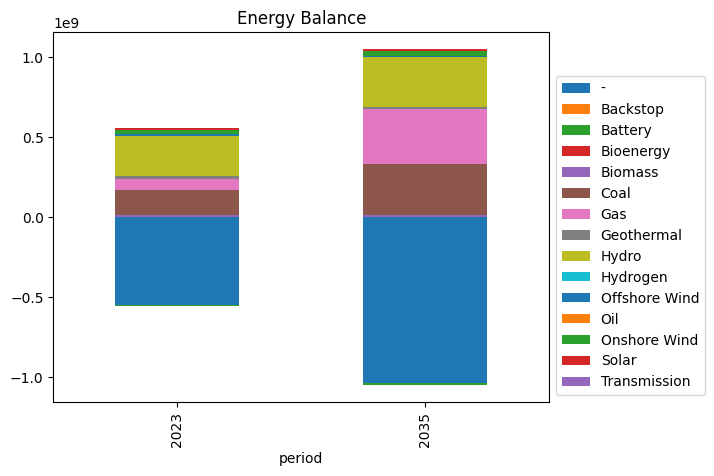

In [51]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()